In [ ]:
from numpy import sqrt
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt

### Generate ground-truth data

In [ ]:
persons = 100
avg_temp = 99
sigma1, sigma2 = 3, 1 
temperatures = np.random.normal(loc=avg_temp, scale=np.sqrt(2),size=100)
thermometer1 = temperatures+np.random.normal(scale=sigma1,size=persons)
thermometer2 = temperatures+np.random.normal(scale=sigma2,size=persons)

###Plot the temperatures

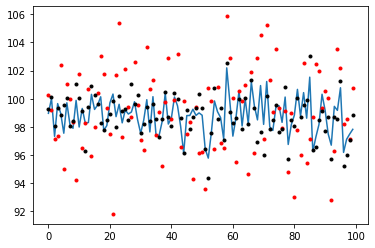

In [ ]:
plt.figure()
plt.plot(temperatures)
plt.plot(thermometer1,'r.')
plt.plot(thermometer2,'k.')

### Kalman filter framework

In [ ]:
filtered_temperatures = []
kalman_gain = sigma1**2/(sigma1**2+sigma2**2)
for t1, t2 in zip(thermometer1, thermometer2):
  filtered = t1 + kalman_gain*(t2-t1)
  filtered_temperatures.append(filtered)

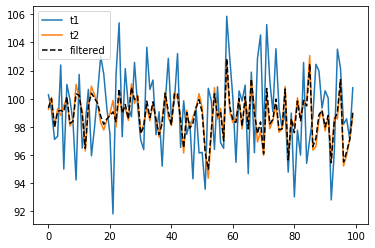

In [ ]:
plt.figure()
plt.plot(thermometer1, label='t1')
plt.plot(thermometer2, label='t2')
plt.plot(filtered_temperatures, 'k--', label='filtered')
plt.legend()

### Root-mean square error
$\{T_i\}$ = set of ground-truth measurements

$\{ \hat{T}_i\}$ = set of predicted measurements

RMS error = $\sqrt{\frac{1}{N}\sum{(T_i-\hat{T}_i)^2}}$

Calculate RMS error when individual thermometers were used and Kalman-filtered measurement is used

In [ ]:
def rms_error(actual, predicted):
  return np.sqrt(np.mean((actual-predicted)**2))

error1 = rms_error(temperatures, thermometer1)
error2 = rms_error(temperatures, thermometer2)
filter_error = rms_error(temperatures, filtered_temperatures)


In [ ]:
print(f"errors using single thermometer {error1:0.3f} {error2:0.3f}")
print(f"error when using Kalman filtered value {filter_error:0.3f}")

errors using single thermometer 2.867 0.925
error when using Kalman filtered value 0.848
